In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [3]:
num_steps = 5
initial_states = np.array([np.random.choice([0,1,2]) for _ in range(30)])
num_nodes = 30
nodes = range(1,31)
num_groups = 3


In [4]:

## Creating beta_t matrices randomly


num_matrices = 5

symmetric_matrices = []

for _ in range(num_matrices):
    random_matrix = np.random.rand(3, 3)
    symmetric_matrix = 0.5 * (random_matrix + random_matrix.T)
    symmetric_matrices.append(symmetric_matrix)

In [5]:
matrices = [np.array([[0.6,0.1],[0.1,0.7]]),
           np.array([[0.78,0.4],[0.4,0.84]]),
           np.array([[0.8,0.5],[0.5,0.8]]),
           np.array([[0.62,0.41],[0.41,0.6]]),
           np.array([[0.87,0.6],[0.6,0.5]])]

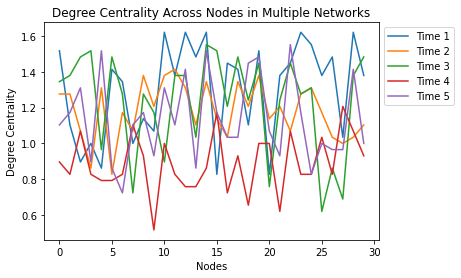

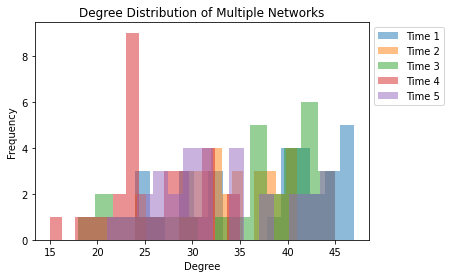

In [6]:
transition_matrix = np.array([[0.8 , 0.05 , 0.15],[0.2,0.75,0.05],[0.25,0.2,0.55]])

## Creating Z_i^t's
# Number of nodes
num_nodes = 30

# Initial states for each node
initial_states = np.random.choice([0, 1, 2], size=num_nodes)

# Number of time steps
num_steps = 5  # You can adjust this based on your requirements

# Initialize an array to store the Markov chains for each node
markov_chains = np.zeros((num_nodes, num_steps), dtype=int)

# Generate Markov chains
for node in range(num_nodes):
    current_state = initial_states[node]
    for step in range(num_steps):
        markov_chains[node, step] = current_state
        current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])



## Creating graphs and plotting number of triangles

def dynSBM(num_nodes, num_steps, Z_nodes_time, symmetric_matrices, initial_states, num_groups=3, plot_networks = False):
    edges = []

    for time in range(num_steps):
        edge_time = np.zeros(shape=(num_nodes, num_nodes))
        for i in range(num_nodes):
            for j in range(num_nodes):
                q = Z_nodes_time[i, time]
                l = Z_nodes_time[j, time]  # Corrected the index for l
                beta_ql_t = symmetric_matrices[time][q, l]
                edge_time[i, j] = int(np.random.binomial(n=1, p=beta_ql_t, size=1)[0])
        edges.append(edge_time)
    
    graphs = []
    for time in range(num_steps):
        G = nx.from_numpy_array(edges[time], create_using=nx.DiGraph)
        graphs.append(G)
        if plot_networks:
            # Choose colors for nodes based on their states
            node_colors = ['red' if state == 1 else 'blue' for state in Z_nodes_time[:, time]]

            # Draw the graph
            pos = nx.spring_layout(G)
            nx.draw(
                G,
                pos,
                with_labels=True,
                font_weight='bold',
                node_size=300,
                node_color=node_colors,
                font_color='black',
                edge_color='gray',
            )

            plt.title(f'Graph at time {time + 1}')
            plt.show()
    return graphs
    #triangles = [sum(nx.triangles(graph).values()) // 3 for graph in graphs]
    #plt.plot(triangles, marker='o', linestyle='-', color='b')
    
graphs = dynSBM(num_nodes = num_nodes,num_steps = num_steps, 
                   Z_nodes_time= markov_chains, symmetric_matrices= symmetric_matrices,
                   initial_states= initial_states,num_groups=3, plot_networks = False) 

def plot_degree_distribution(graph, label):
    degrees = [graph.degree(node) for node in graph.nodes()]
    plt.hist(degrees, bins=15, alpha=0.5, label=label)

def plot_degree_centrality_line(graph, label):
    degree_centrality = nx.degree_centrality(graph)
    nodes = list(graph.nodes())
    centrality_values = [degree_centrality[node] for node in nodes]

    plt.plot(nodes, centrality_values, label=label)
    
for i, network in enumerate(graphs):
    plot_degree_centrality_line(network, f'Time {i+1}')

# Customize the plot
plt.title('Degree Centrality Across Nodes in Multiple Networks')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



# Plot degree distribution for each network in the list
for i, network in enumerate(graphs):
    plot_degree_distribution(network, f'Time {i+1}')
    

# Customize the plot
plt.title('Degree Distribution of Multiple Networks')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

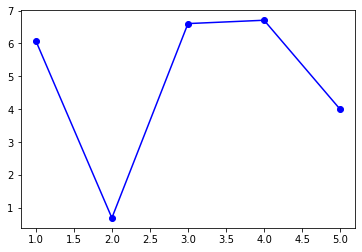

In [24]:
def plot_motif_counts(dynamic_digraph, motif_edges):
    
    motif_counts = []

    for time_step, graph in enumerate(dynamic_digraph):
        # Count motifs in the directed graph
        motifs = nx.algorithms.isomorphism.DiGraphMatcher(graph, nx.DiGraph(motif_edges))
        motif_count = len(list(motifs.subgraph_isomorphisms_iter()))
        motif_counts.append(motif_count)

    return motif_counts
    # Plot motif counts over time
    #plt.plot(range(1, len(dynamic_digraph) + 1), motif_counts, marker='o', linestyle='-', color='b')


# Example usage
motif_edges = [(0, 1), (1, 2), (0,3)]  # Change this to the edges of the motif you are interested in

multiple_motifs = []
for _ in range(500):
    graphs = dynSBM(num_nodes = num_nodes,num_steps = num_steps, 
                       Z_nodes_time= markov_chains, symmetric_matrices= symmetric_matrices,
                       initial_states= initial_states,num_groups=3, plot_networks = False) 

    multiple_motifs.append(plot_motif_counts(graphs, motif_edges))
    
arrays = [np.array(x) for x in multiple_motifs]

    
#plt.xlabel('Time Steps')
#plt.ylabel('Motif Count')
#plt.title('Motif Analysis in Dynamic Directed Graph')
#plt.show()





plt.plot(range(1, 6), [np.mean(k) for k in zip(*arrays)], marker='o', linestyle='-', color='b')

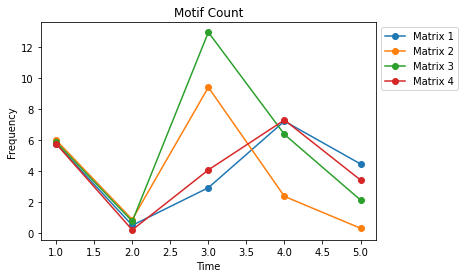

In [33]:
def plot_motif_counts(dynamic_digraph, motif_edges):
    motif_counts = []

    for time_step, graph in enumerate(dynamic_digraph):
        # Count motifs in the directed graph
        motifs = nx.algorithms.isomorphism.DiGraphMatcher(graph, nx.DiGraph(motif_edges))
        motif_count = len(list(motifs.subgraph_isomorphisms_iter()))
        motif_counts.append(motif_count)

    return motif_counts
    # Plot motif counts over time
    #plt.plot(range(1, len(dynamic_digraph) + 1), motif_counts, marker='o', linestyle='-', color='b')


# Example usage
motif_edges = [(0, 1), (1, 2), (0,3)]  # Change this to the edges of the motif you are interested in

def motif_as_transition(transition_matrix):
    markov_chains = np.zeros((num_nodes, num_steps), dtype=int)

    # Generate Markov chains
    for node in range(num_nodes):
        current_state = initial_states[node]
        for step in range(num_steps):
            markov_chains[node, step] = current_state
            current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
    multiple_motifs = []
    for _ in range(1000):
        graphs = dynSBM(num_nodes = num_nodes,num_steps = num_steps, 
                           Z_nodes_time= markov_chains, symmetric_matrices= symmetric_matrices,
                           initial_states= initial_states,num_groups=3, plot_networks = False) 

        multiple_motifs.append(plot_motif_counts(graphs, motif_edges))

    arrays = [np.array(x) for x in multiple_motifs]
    return [np.mean(k) for k in zip(*arrays)]

M1 = np.array([[0.8 , 0.05 , 0.15], [0.1 , 0.6 , 0.3], [0.2 , 0.05 , 0.75]])
M2 = np.array([[0.65 , 0.3 , 0.05], [0.1 , 0.6 , 0.3], [0.2 , 0.05 , 0.75]])
M3= np.array([[0.65 , 0.3 , 0.05], [0.2 , 0.75 , 0.05], [0.2 , 0.05 , 0.75]])
M4= np.array([[0.8 , 0.05 , 0.15], [0.1 , 0.6 , 0.3], [0.25 , 0.2 , 0.55]])



for i, mat in enumerate([M1,M2,M3,M4]):
    count = motif_as_transition(mat)
    plt.plot(range(1, 6), count, marker='o', linestyle='-', label = f'Matrix {i+1}')

plt.title('Motif Count')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#plt.plot(range(1, 6), [np.mean(k) for k in zip(*arrays)], marker='o', linestyle='-', color='b')